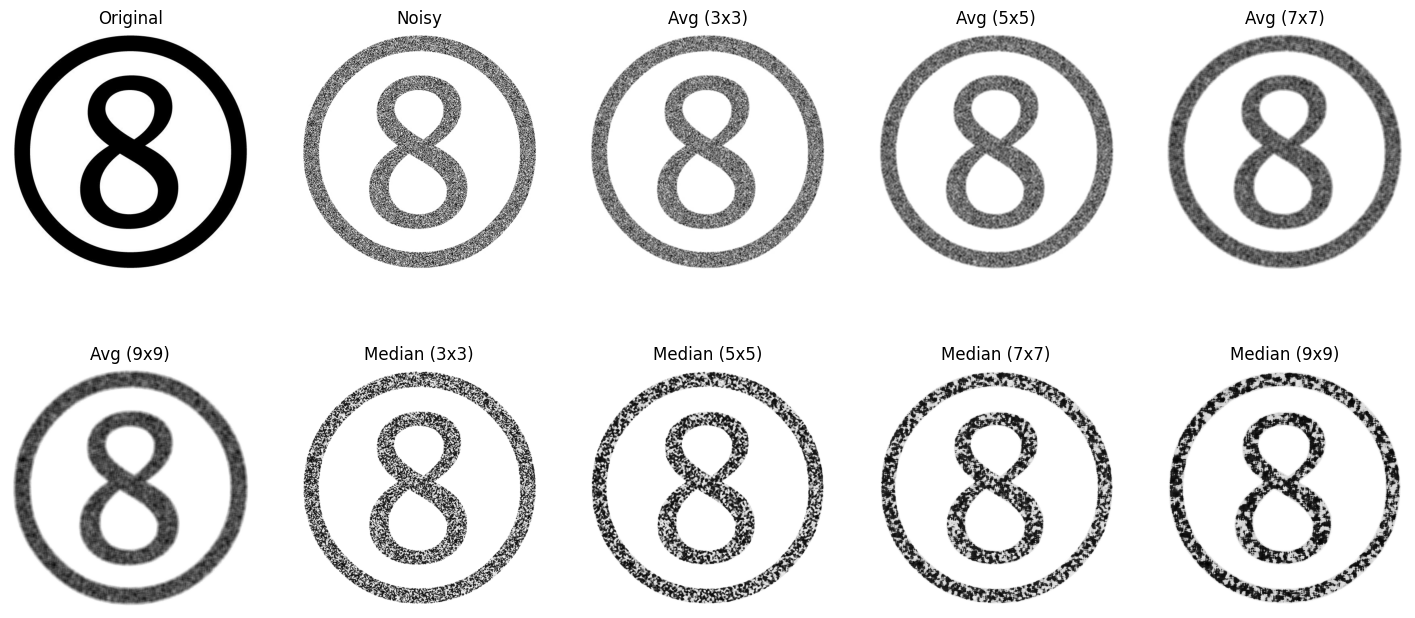

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)


# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

# Apply smoothing filters
avg_filter_3x3 = cv2.blur(noisy_img, (3, 3))
avg_filter_5x5 = cv2.blur(noisy_img, (5, 5))
avg_filter_7x7 = cv2.blur(noisy_img, (7, 7))
avg_filter_9x9 = cv2.blur(noisy_img, (9, 9))

median_filter_3x3 = cv2.medianBlur(noisy_img, 3)
median_filter_5x5 = cv2.medianBlur(noisy_img, 5)
median_filter_7x7 = cv2.medianBlur(noisy_img, 7)
median_filter_9x9 = cv2.medianBlur(noisy_img, 9)

# Display results
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
titles = ['Original', 'Noisy', 'Avg (3x3)', 'Avg (5x5)', 'Avg (7x7)', 
          'Avg (9x9)', 'Median (3x3)', 'Median (5x5)', 'Median (7x7)', 'Median (9x9)']
images = [img, noisy_img, avg_filter_3x3, avg_filter_5x5, avg_filter_7x7,
          avg_filter_9x9, median_filter_3x3, median_filter_5x5, median_filter_7x7, median_filter_9x9]

for ax, title, im in zip(axes.ravel(), titles, images):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


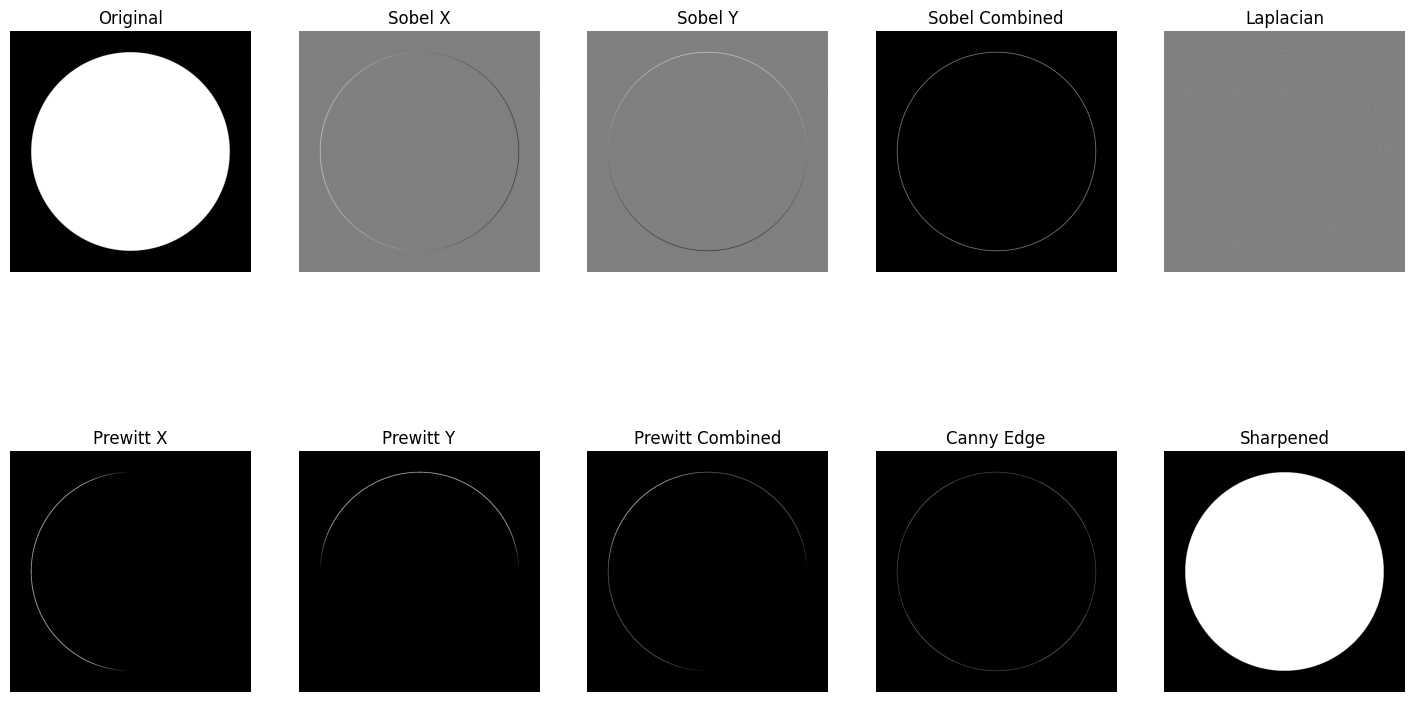

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('circuit.png', cv2.IMREAD_GRAYSCALE)


# Apply Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Apply Prewitt filter
prewitt_x = cv2.filter2D(img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(img, 50, 150)

# Apply Custom Sharpening Kernel
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpening_kernel)

# Display results
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
titles = ['Original', 'Sobel X', 'Sobel Y', 'Sobel Combined', 'Laplacian',
          'Prewitt X', 'Prewitt Y', 'Prewitt Combined', 'Canny Edge', 'Sharpened']
images = [img, sobel_x, sobel_y, sobel_combined, laplacian,
          prewitt_x, prewitt_y, prewitt_combined, canny_edges, sharpened]

for ax, title, im in zip(axes.ravel(), titles, images):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()
